<a href="https://colab.research.google.com/github/JMML2021/Entrega-projecte-final/blob/main/2.Calculo_Ry2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar librerias:

import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
 

In [3]:
path= '/content/drive/MyDrive/Ficheros de Vueling/2019RyanairCORTO.xlsx'
path= '/content/drive/MyDrive/Ficheros de Vueling/2019Ryanair.xlsx'

In [4]:
# Abrir fichero de Github. 

Hoja = '2019Ryamair'
df = pd.read_excel(path, sheet_name=Hoja)


# Analitzo informació de la base de dades.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750954 entries, 0 to 750953
Data columns (total 8 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Mes, Día, Año de Flight_Date_Calculated_TST  750954 non-null  object        
 1   scheduled_gate_departure                     750946 non-null  datetime64[ns]
 2   scheduled_gate_arrival                       750951 non-null  datetime64[ns]
 3   actual_gate_departure                        721061 non-null  datetime64[ns]
 4   actual_gate_arrival                          726993 non-null  datetime64[ns]
 5   tail_number                                  746797 non-null  object        
 6   departure_airport_id                         750954 non-null  object        
 7   arrival_at_cd_airport                        746917 non-null  object        
dtypes: datetime64[ns](4), object(4)
memory usage: 45.8+ MB


In [6]:
# Els noms de les columnes tenen molts espais en blanc

nombreColumnas= df.columns
nombreColumnas

Index(['Mes, Día, Año de Flight_Date_Calculated_TST',
       'scheduled_gate_departure', 'scheduled_gate_arrival',
       'actual_gate_departure', 'actual_gate_arrival', 'tail_number',
       'departure_airport_id', 'arrival_at_cd_airport'],
      dtype='object')

In [7]:
# Aqui corrijo los nombre de las columnas
nombreColumnaCorregido= ['DATE', 'STD', 'STA', 'ATD','ATA', 'REG', 'DEP', 'ARR']
 
                         
# Proceso para cambiar el nombre de las columnas por un bucle FOR
for n, m in enumerate(nombreColumnas):
  print(n, m,'*',nombreColumnaCorregido[n],'-')
  df.rename({m: nombreColumnaCorregido[n]}, axis=1, inplace=True)

df.head()

0 Mes, Día, Año de Flight_Date_Calculated_TST * DATE -
1 scheduled_gate_departure * STD -
2 scheduled_gate_arrival * STA -
3 actual_gate_departure * ATD -
4 actual_gate_arrival * ATA -
5 tail_number * REG -
6 departure_airport_id * DEP -
7 arrival_at_cd_airport * ARR -


,DATE,STD,STA,ATD,ATA,REG,DEP,ARR
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN


## Crear columnes de Mes, hora, etc

In [8]:
df['MES'] = df['STD'].dt.month
df['Setmana'] = df['STD'].dt.week
df['DiaSetmana'] = df['STD'].dt.dayofweek
df['DiaSetmanaName'] = df['STD'].dt.day_name()
df['Hour'] = df['STD'].dt.hour
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0


In [9]:
# Calculo tiempo de vuelo teorico Real y error

df['DuracionVueloTeorico1']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal1'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo1']= df['DuracionVueloReal1']-df['DuracionVueloTeorico1']
df['E_Duracion_Vuelo1'].head(3)

media = round(df['E_Duracion_Vuelo1'].mean(),2)

print('\n\nError medio en tiempo de vuelo',media)



Error medio en tiempo de vuelo -6.24


In [10]:
#Calculo error arrivada:

df['E_Puntualidad1'] = (df['ATA']- df['STA']) /  np.timedelta64(1, 'm')

In [11]:
#Calculo error enlairament:
df['E_Despegue1'] = (df['ATD']- df['STD']) /  np.timedelta64(1, 'm')


## Calcul sequencia del vol per dia

In [12]:

df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank().round(0)
print(df[['Secuencia','REG','STD', 'ARR']][0:6])

   Secuencia     REG                 STD  ARR
0        1.0  EI-DAC 2019-04-01 10:30:00  OTP
1        2.0  EI-DAC 2019-04-01 13:20:00  MXP
2        3.0  EI-DAC 2019-04-01 16:10:00  PMO
3        4.0  EI-DAC 2019-04-01 18:45:00  MXP
4        1.0  EI-DAD 2019-04-01 05:30:00  BCN
5        2.0  EI-DAD 2019-04-01 07:55:00  OPO


In [13]:
value_counts = df['Secuencia'].value_counts()
 
Sequencies3 = pd.DataFrame(value_counts)
Sequencies3[:5]

,Secuencia
1.0,144225
2.0,142677
3.0,135663
4.0,131338
5.0,87773


Text(0.5, 1.0, 'Quantitat de vols que te cada salt')

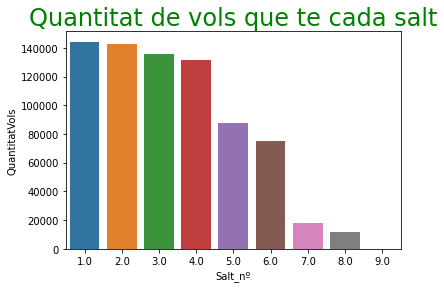

In [14]:
# Agrupar per quantiat de vols, 

value_counts = df['Secuencia'].value_counts()  
 
Sequencies3 = pd.DataFrame(value_counts)

Sequencies3 = Sequencies3.reset_index() 
Sequencies3.columns = ['Salt_nº', 'QuantitatVols'] # change column names
Sequencies3= Sequencies3[:9]

ax=sns.barplot(x = 'Salt_nº', y = 'QuantitatVols',   data=Sequencies3)

ax.set_title('Quantitat de vols que te cada salt', fontsize = 24, color= 'green')
#plt.suptitle(f'filtrat outliers')

In [15]:
df1=df.copy()
df1.head()

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0,145.0,143.0,-2.0,18.0,20.0,2.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0,110.0,100.0,-10.0,20.0,30.0,3.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0,110.0,97.0,-13.0,0.0,13.0,4.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0,110.0,115.0,5.0,5.0,0.0,1.0


# Creo el "lags" per tenir tots el registres en una sola linea

La idea de crear aquest lag es poder tenir en una sola linea tota la informació dels 3 salts que es que em preguntan.
El que faig es pujar la celda a la linea de la Secuencia 1 de aquel avió y d'aquell dia. Despre´s filtraré tot per la secuencia=1 

In [16]:
#Creamos los LAGs
df[f'E_Despegue2']= df['E_Despegue1'].shift(periods=-1) 
df[f'E_Despegue3']= df['E_Despegue1'].shift(periods=-2) 

df[f'E_Duracion_Vuelo2']= df['E_Duracion_Vuelo1'].shift(periods=-1) 
df[f'E_Duracion_Vuelo3']= df['E_Duracion_Vuelo1'].shift(periods=-2) 

df[f'E_Puntualidad2']= df['E_Puntualidad1'].shift(periods=-1) 
df[f'E_Puntualidad3']= df['E_Puntualidad1'].shift(periods=-2) 

## Calcul temps a terra després del primer salt

In [17]:
# Calculo el temps que l'avió està a terra per fer el boardings

# Nota: pels estudis es recomana només fer servir les línies de seqüència =1 per què hi ha dies que 
# l'avió només va un vol i el calculo és erroni, però per simplificar si filtrem per Seqüència=1 i limiten 
# els registres de temps que no siguin >-30 i <30 minuts

df[f'STD2']= df['STD'].shift(periods=-1)   
df[f'tempsTerraEstimat']= (df['STD'].shift(periods=-1) - df['STA'])/  np.timedelta64(1, 'm')
df[f'tempsTerraReal']= (df['ATD'].shift(periods=-1) - df['ATA'])/  np.timedelta64(1, 'm')
df[f'E_tempsTerra'] = df[f'tempsTerraReal'] -df[f'tempsTerraEstimat']
df.loc[1:3]

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,...,E_Despegue2,E_Despegue3,E_Duracion_Vuelo2,E_Duracion_Vuelo3,E_Puntualidad2,E_Puntualidad3,STD2,tempsTerraEstimat,tempsTerraReal,E_tempsTerra
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,...,30.0,13.0,-10.0,-13.0,20.0,0.0,2019-04-01 16:10:00,25.0,37.0,12.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,...,13.0,0.0,-13.0,5.0,0.0,5.0,2019-04-01 18:45:00,45.0,38.0,-7.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,...,0.0,14.0,5.0,-8.0,5.0,6.0,2019-04-01 05:30:00,-905.0,-905.0,0.0



# Impacta de l'aeroport en el retard

In [18]:
# Agrupar per quantiat de vols, 

value_counts = df1['ARR'].value_counts()  

# converting to df and assigning new names to the columns
df_aeroports = pd.DataFrame(value_counts)

df_aeroports = df_aeroports.reset_index() 
df_aeroports.columns = ['ARR', 'QuantitatVols'] # change column names



df_aeroports['Grup_Aeroport'] = df_aeroports["QuantitatVols"].apply(lambda x: int(x) if int(x)>19000 else 'Resto') 

df_aeroports.Grup_Aeroport = df_aeroports.ARR.where(df_aeroports.QuantitatVols>19000, 'Resto')
df_aeroports=pd.DataFrame(df_aeroports)
df_aeroports


,ARR,QuantitatVols,Grup_Aeroport
0,STN,58731,STN
1,DUB,41018,DUB
2,BGY,29309,BGY
3,BCN,22893,BCN
4,MAD,19561,MAD
...,...,...,...
237,VIE,5,Resto
238,KEF,2,Resto
239,RVN,1,Resto
240,FDH,1,Resto


In [19]:
# Incorporo la columna agrupada de Aeroports creada anteriorment

df1=pd.DataFrame(df1)
resultado= pd.merge(df1, df_aeroports)
resultado.drop(['QuantitatVols'], axis=1)


,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia,Grup_Aeroport
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0,Resto
1,1 de abril de 2019,2019-04-01 16:20:00,2019-04-01 18:25:00,2019-04-01 16:20:00,2019-04-01 18:06:00,EI-DWD,CIA,OTP,4.0,14.0,0.0,Monday,16.0,125.0,106.0,-19.0,-19.0,0.0,5.0,Resto
2,1 de abril de 2019,2019-04-01 16:15:00,2019-04-01 18:25:00,2019-04-01 17:16:00,2019-04-01 19:22:00,EI-DWR,SXF,OTP,4.0,14.0,0.0,Monday,16.0,130.0,126.0,-4.0,57.0,61.0,5.0,Resto
3,1 de abril de 2019,2019-04-01 05:20:00,2019-04-01 07:30:00,2019-04-01 05:20:00,2019-04-01 07:20:00,EI-DWT,SXF,OTP,4.0,14.0,0.0,Monday,5.0,130.0,120.0,-10.0,-10.0,0.0,1.0,Resto
4,1 de abril de 2019,2019-04-01 05:00:00,2019-04-01 06:05:00,2019-04-01 04:48:00,2019-04-01 05:39:00,EI-EFE,TSR,OTP,4.0,14.0,0.0,Monday,5.0,65.0,51.0,-14.0,-26.0,-12.0,2.0,Resto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746912,14 de noviembre de 2019,2019-11-14 07:00:00,NaT,NaT,NaT,NaN,VCV,KEF,11.0,46.0,3.0,Thursday,7.0,NaN,NaN,NaN,NaN,NaN,3559.0,Resto
746913,26 de noviembre de 2019,2019-11-26 06:00:00,NaT,NaT,NaT,EI-DCL,VCV,KEF,11.0,48.0,1.0,Tuesday,6.0,NaN,NaN,NaN,NaN,NaN,1.0,Resto
746914,15 de diciembre de 2019,2019-12-15 08:00:00,2019-12-15 11:40:00,NaT,NaT,EI-GDY,SNN,RVN,12.0,50.0,6.0,Sunday,8.0,220.0,NaN,NaN,NaN,NaN,1.0,Resto
746915,15 de junio de 2019,2019-06-15 14:40:00,2019-06-15 16:40:00,2019-06-15 14:36:00,NaT,EI-EFK,PMI,FDH,6.0,24.0,5.0,Saturday,14.0,120.0,NaN,NaN,NaN,-4.0,3.0,Resto


In [20]:
# Filtro els outliers

df3=resultado.copy()
dfEliminarOutliers= ((resultado['Secuencia']== 1) & (resultado['E_Despegue1']< 30) & (resultado['E_Despegue1']> -30))

df3 = df3[dfEliminarOutliers]

In [21]:
value_counts = df3['Grup_Aeroport'].value_counts()  

df_aeroports2 = pd.DataFrame(value_counts)
df_aeroports2

,Grup_Aeroport
Resto,110187
STN,8301
BGY,4521
MAD,3416
DUB,3098
BCN,3023


Text(0.5, 0.98, 'filtrat outliers')

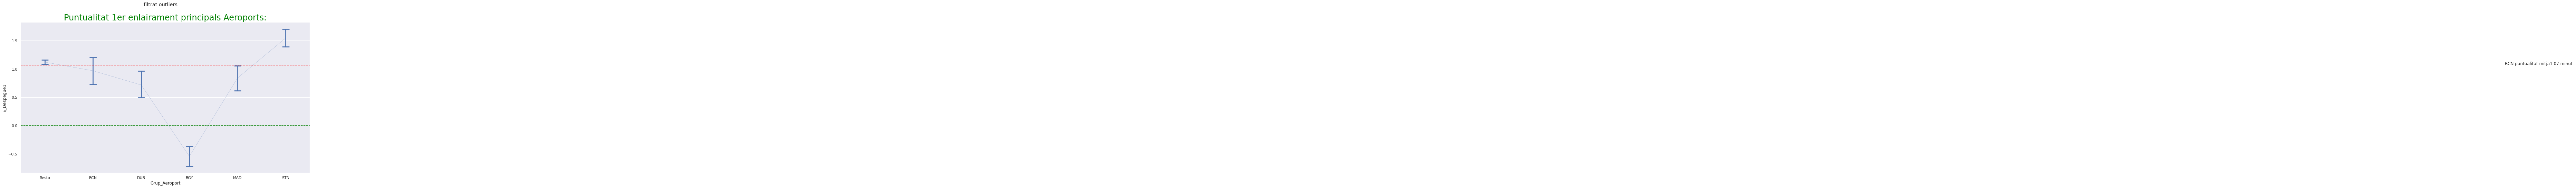

In [22]:
# Intervals de confiança per aeroport
 
sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Grup_Aeroport', y = "E_Despegue1", data= df3, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df3['E_Despegue1'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN +50 ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat 1er enlairament principals Aeroports:', fontsize = 24, color= 'green')
plt.suptitle(f'filtrat outliers')

# df2 Seqüencia 1 - Barcelona

In [23]:
# Filtre primer enlairament a Barcelona

vuelosPrimerDespegue= ((df1['Secuencia']== 1) & (df1['DEP']=='BCN'))
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])

                    DATE     REG  Secuencia                 STD
193   1 de abril de 2019  EI-DHF        1.0 2019-04-01 04:05:00
214   1 de abril de 2019  EI-DHR        1.0 2019-04-01 04:00:00
294   1 de abril de 2019  EI-DLJ        1.0 2019-04-01 04:15:00
528   1 de abril de 2019  EI-DWM        1.0 2019-04-01 04:20:00
774   1 de abril de 2019  EI-EBW        1.0 2019-04-01 06:40:00
947   1 de abril de 2019  EI-EKN        1.0 2019-04-01 06:30:00
1554  1 de abril de 2019  EI-FOK        1.0 2019-04-01 04:30:00
1566  1 de abril de 2019  EI-FOM        1.0 2019-04-01 05:50:00


Text(0.5, 0, 'Error (minuts)')

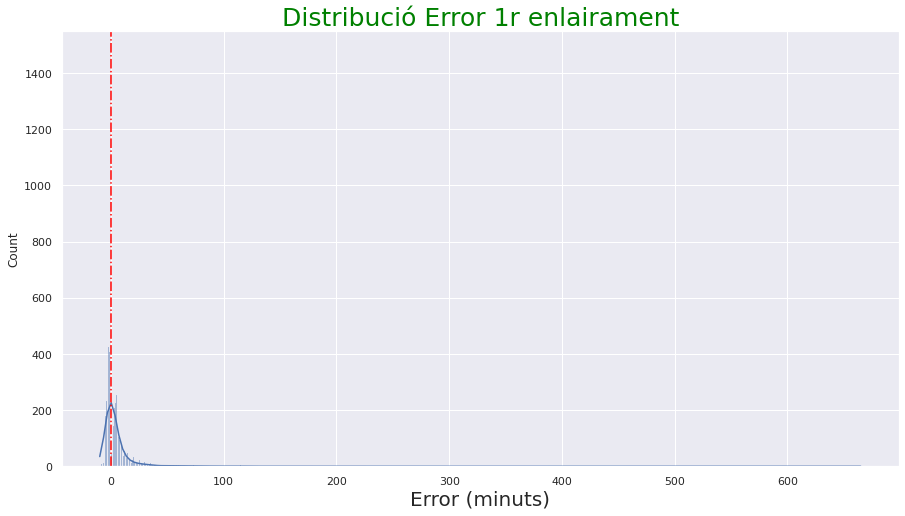

In [24]:
#@title Impacta dels outliers.
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue1, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error 1r enlairament', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)

Aquí veiem que els **outliers** afectaran moltíssim al resultat final, per això sempre els hem de filtrar les dades


Mitjana filtrada =  2.05 minuts


Text(0.5, 0, 'Error (minuts)')

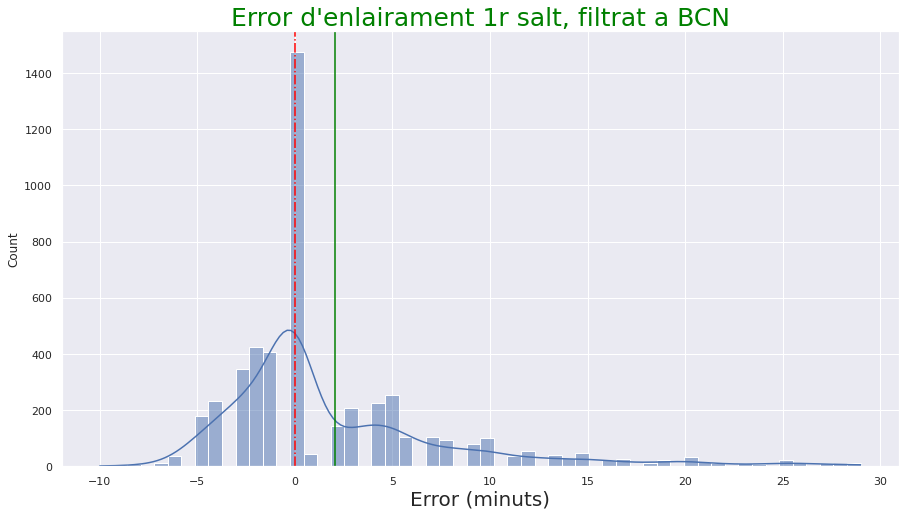

In [25]:
#@title Eliminar los outliers
df2=df2.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue1']< 30) & (df2['E_Despegue1']> -30))

df2 = df2[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue1, kde= True)
p.set_title("Error d'enlairament 1r salt, filtrat a BCN", fontsize=25, color='green')
mediaFiltrada = round(df2['E_Despegue1'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

**Enlairament Barcelona**
La sortida de Barcelona, la seva moda clarament es veu que és 0, però la seva mitjana es  de 2.05 minuts tard 

Text(0.5, 1.0, 'Puntualitat enlairament per hora del dia:')

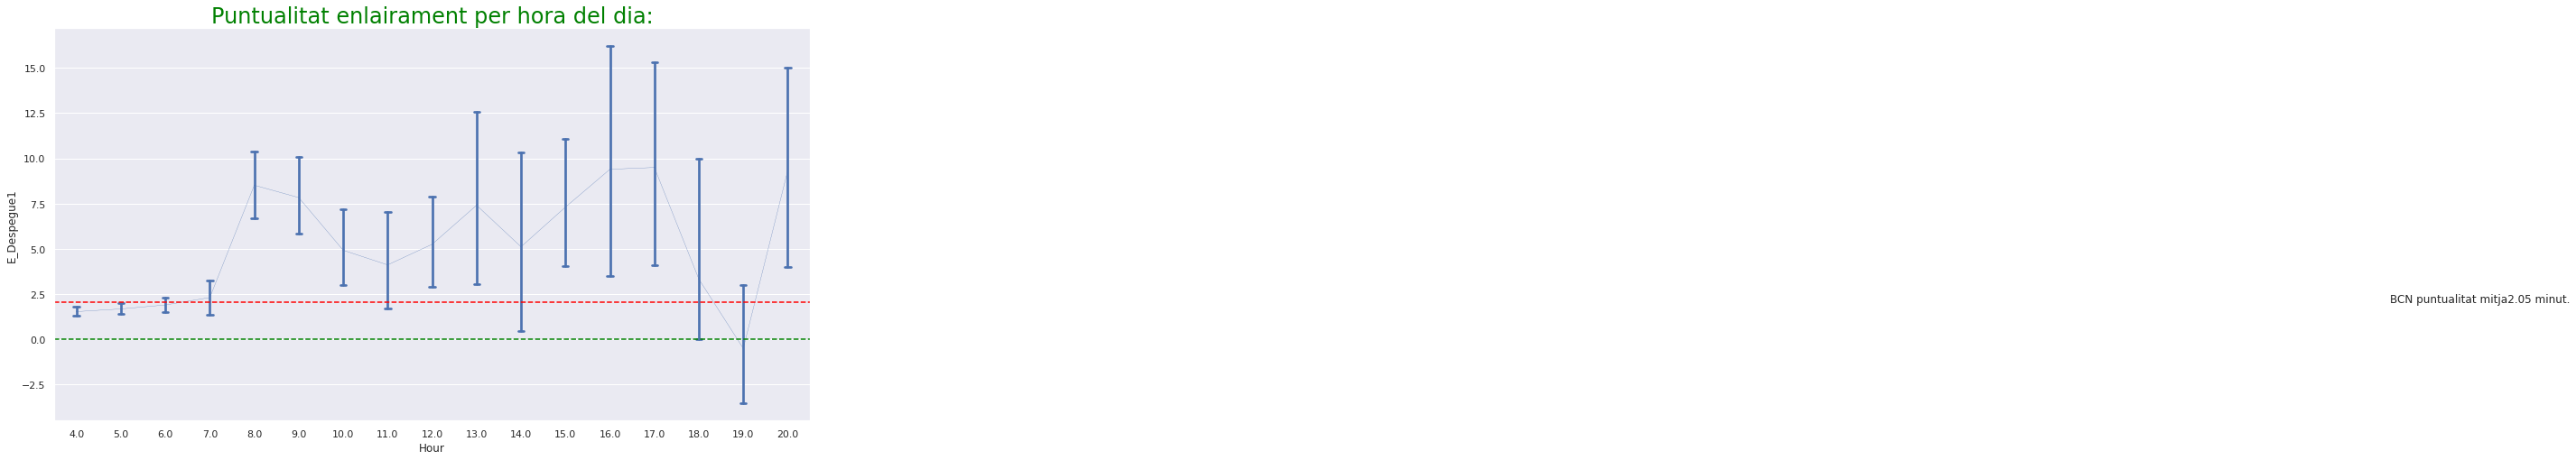

In [26]:
#@title Intervalos de Confianza durant el dia

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Hour', y = "E_Despegue1", data= df2, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df2['E_Despegue1'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN +50 ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat enlairament per hora del dia:', fontsize = 24, color= 'green')

# Estudi puntualitat primer salt

Text(0.5, 0, 'Error (minuts)')

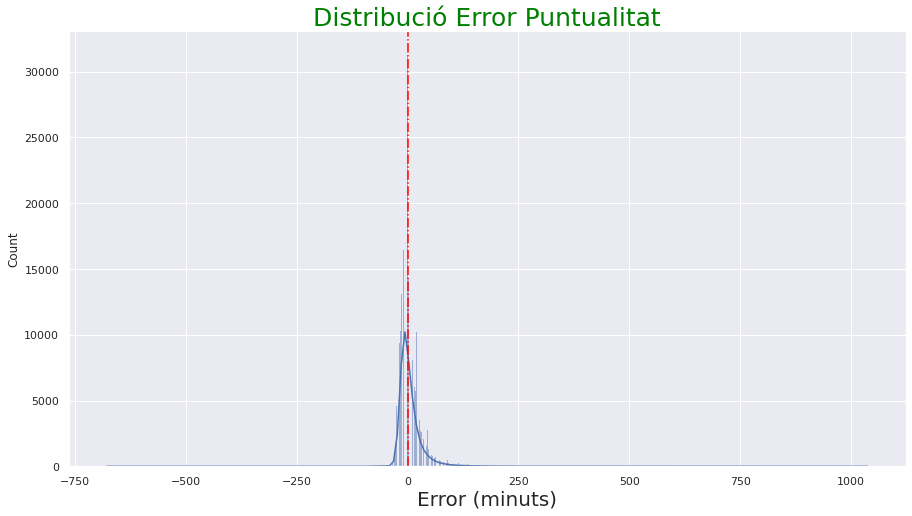

In [27]:
plt.figure(figsize = (15,8))
p= sns.histplot(data= df.E_Puntualidad1, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error Puntualitat', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)

Aquí clarament es veu que hi ha molts d'outliers. Acordem per convenció que limitaren les anàlisis a només els vols que tenen entre -30 y +30 minuts de falta de puntualitat.


---




Mitjana filtrada =  -1.47 minuts


Text(0.5, 0, 'Error (minuts)')

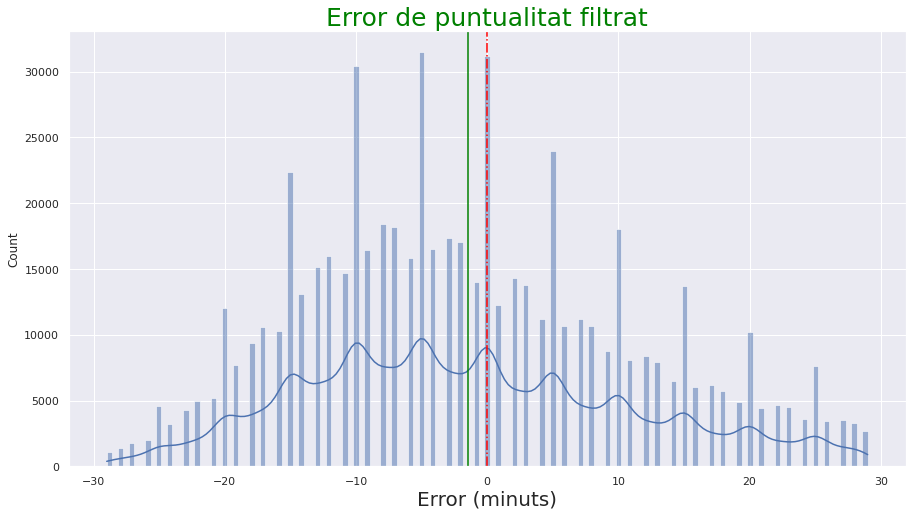

In [28]:
# Eliminar els outliers
df2=df.copy()
dfEliminarOutliers= ( (df2['E_Puntualidad1']< 30) & (df2['E_Puntualidad1']> -30))

df2 = df2[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Puntualidad1, kde= True)
p.set_title("Error de puntualitat filtrat", fontsize=25, color='green')

mediaFiltrada = round(df2['E_Puntualidad1'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

**Conclusió:**

En el primer salt veiem que la mitjana es de -1.47 minuts d'avançament a l'hora de la sortida.

Text(0.5, 1.0, 'Puntualitat enlairament per salt del dia:')

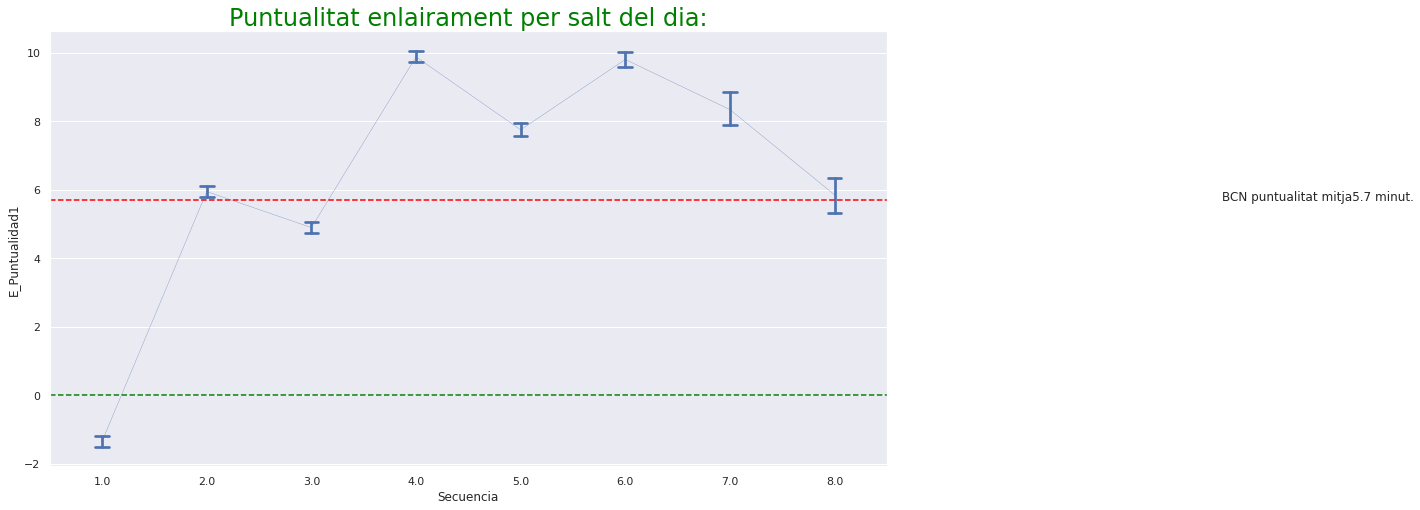

In [29]:
#@title Intervals de Confianza per salt

# Trec tots els registres que no tinc el "REG" de l'avió.

filtered_df = df[df['REG'].notnull()]

# Limito el gràfic només als primers 9 salts per dia
dfEliminarMesGrans9Salts = (  ( filtered_df['Secuencia']< 9))
filtered_df = filtered_df[dfEliminarMesGrans9Salts]


sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Secuencia', y = "E_Puntualidad1", data= filtered_df, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df['E_Puntualidad1'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN+5 ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat enlairament per salt del dia:', fontsize = 24, color= 'green')



A lo llarg del dia 

Text(0.5, 1.0, 'Puntualitat per salt del dia,')

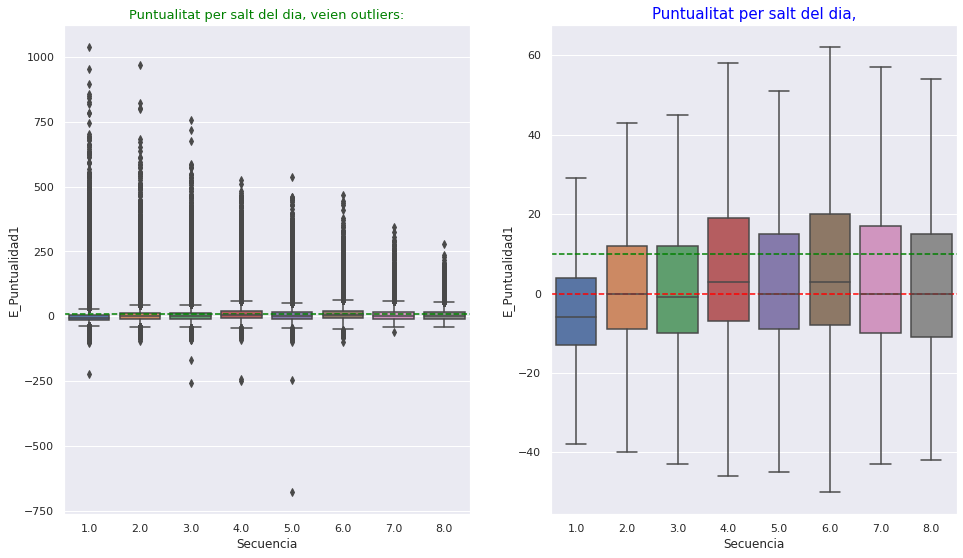

In [30]:
f, axes = plt.subplots(1, 2, figsize=(16, 9)) 

ax1=sns.boxplot(  x='Secuencia', y = "E_Puntualidad1", data= filtered_df,  orient='v' , ax=axes[0])
#axes.set_title("Title for first plot")
ax1.axhline(10, color="green", linestyle = '--' )

ax2=sns.boxplot(  x='Secuencia', y = "E_Puntualidad1", data= filtered_df,  orient='v' , ax=axes[1], showfliers = False)
ax2.axhline(10, color="green", linestyle = '--' )
ax2.axhline(0, color="red", linestyle = '--' )
ax1.set_title('Puntualitat per salt del dia, veien outliers:', fontsize = 13, color= 'green')
ax2.set_title('Puntualitat per salt del dia,', fontsize = 15, color= 'blue')

In [31]:
prueba= filtered_df

dfEliminarOutliers= ( (filtered_df['Secuencia']> 8))

prueba = prueba[dfEliminarOutliers]
prueba

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,...,E_Despegue2,E_Despegue3,E_Duracion_Vuelo2,E_Duracion_Vuelo3,E_Puntualidad2,E_Puntualidad3,STD2,tempsTerraEstimat,tempsTerraReal,E_tempsTerra


In [32]:
#  Prova per verificar que és veritat que hi ha més de 6 salts per dia d'un avió 
prueba= filtered_df
 
dfEliminarOutliers= (  ( filtered_df['REG']=='EI-FTA') & (filtered_df['DATE']== '9 de agosto de 2019'))
prueba2 = prueba[dfEliminarOutliers]
prueba2.tail(3)

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,...,E_Despegue2,E_Despegue3,E_Duracion_Vuelo2,E_Duracion_Vuelo3,E_Puntualidad2,E_Puntualidad3,STD2,tempsTerraEstimat,tempsTerraReal,E_tempsTerra
730435,9 de agosto de 2019,2019-08-09 14:00:00,2019-08-09 15:10:00,2019-08-09 14:52:00,2019-08-09 15:55:00,EI-FTA,BHX,DUB,8.0,32.0,...,54.0,67.0,6.0,-4.0,60.0,63.0,2019-08-09 15:40:00,30.0,39.0,9.0
730436,9 de agosto de 2019,2019-08-09 15:40:00,2019-08-09 16:45:00,2019-08-09 16:34:00,2019-08-09 17:45:00,EI-FTA,DUB,MAN,8.0,32.0,...,67.0,68.0,-4.0,-10.0,63.0,58.0,2019-08-09 17:10:00,25.0,32.0,7.0
730437,9 de agosto de 2019,2019-08-09 17:10:00,2019-08-09 18:10:00,2019-08-09 18:17:00,2019-08-09 19:13:00,EI-FTA,MAN,DUB,8.0,32.0,...,68.0,63.0,-10.0,-13.0,58.0,50.0,2019-08-09 18:35:00,25.0,30.0,5.0


In [33]:
#  Prova per verificar que és veritat que hi ha Números de seqüència que no són enters.

prueba= filtered_df
 
dfEliminarOutliers= (  ( filtered_df['REG']== 'EI-ENM') & (filtered_df['DATE']== '1 de julio de 2019'))
prueba2 = prueba[dfEliminarOutliers]
prueba2

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,...,E_Despegue2,E_Despegue3,E_Duracion_Vuelo2,E_Duracion_Vuelo3,E_Puntualidad2,E_Puntualidad3,STD2,tempsTerraEstimat,tempsTerraReal,E_tempsTerra
11110,1 de julio de 2019,2019-07-01 05:00:00,2019-07-01 09:05:00,2019-07-01 05:47:00,2019-07-01 09:53:00,EI-ENM,BRU,LCA,7.0,27.0,...,124.0,12.0,-10.0,-4.0,114.0,8.0,2019-07-01 09:30:00,25.0,101.0,76.0
11111,1 de julio de 2019,2019-07-01 09:30:00,2019-07-01 14:00:00,2019-07-01 11:34:00,2019-07-01 15:54:00,EI-ENM,LCA,BRU,7.0,27.0,...,12.0,15.0,-4.0,0.0,8.0,15.0,2019-07-01 16:30:00,150.0,48.0,-102.0
11112,1 de julio de 2019,2019-07-01 16:30:00,2019-07-01 18:15:00,2019-07-01 16:42:00,2019-07-01 18:23:00,EI-ENM,BRU,DUB,7.0,27.0,...,15.0,199.0,0.0,-19.0,15.0,180.0,2019-07-01 18:40:00,25.0,32.0,7.0
11113,1 de julio de 2019,2019-07-01 18:40:00,2019-07-01 19:45:00,2019-07-01 18:55:00,2019-07-01 20:00:00,EI-ENM,DUB,EMA,7.0,27.0,...,199.0,4.0,-19.0,-11.0,180.0,-7.0,2019-07-01 18:40:00,-65.0,119.0,184.0
11114,1 de julio de 2019,2019-07-01 18:40:00,2019-07-01 20:25:00,2019-07-01 21:59:00,2019-07-01 23:25:00,EI-ENM,DUB,BRU,7.0,27.0,...,4.0,4.0,-11.0,-22.0,-7.0,-18.0,2019-07-01 20:25:00,0.0,-176.0,-176.0
11115,1 de julio de 2019,2019-07-01 20:25:00,2019-07-01 21:30:00,2019-07-01 20:29:00,2019-07-01 21:23:00,EI-ENM,EMA,DUB,7.0,27.0,...,4.0,-3.0,-22.0,-1.0,-18.0,-4.0,2019-07-01 06:00:00,-930.0,-919.0,11.0


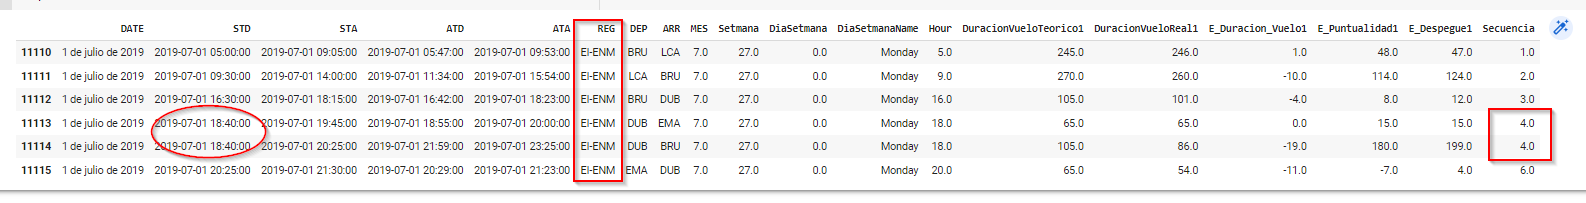

Alerta: el vol que ha arribat a Dublín s'ha dividit en 2 capa EMA i capa BRU

# Impacta del "MES" en la puntualitat

Puntualitat BCN 1r salt:  -5.27


Text(0.5, 0.98, 'filtrat outliers')

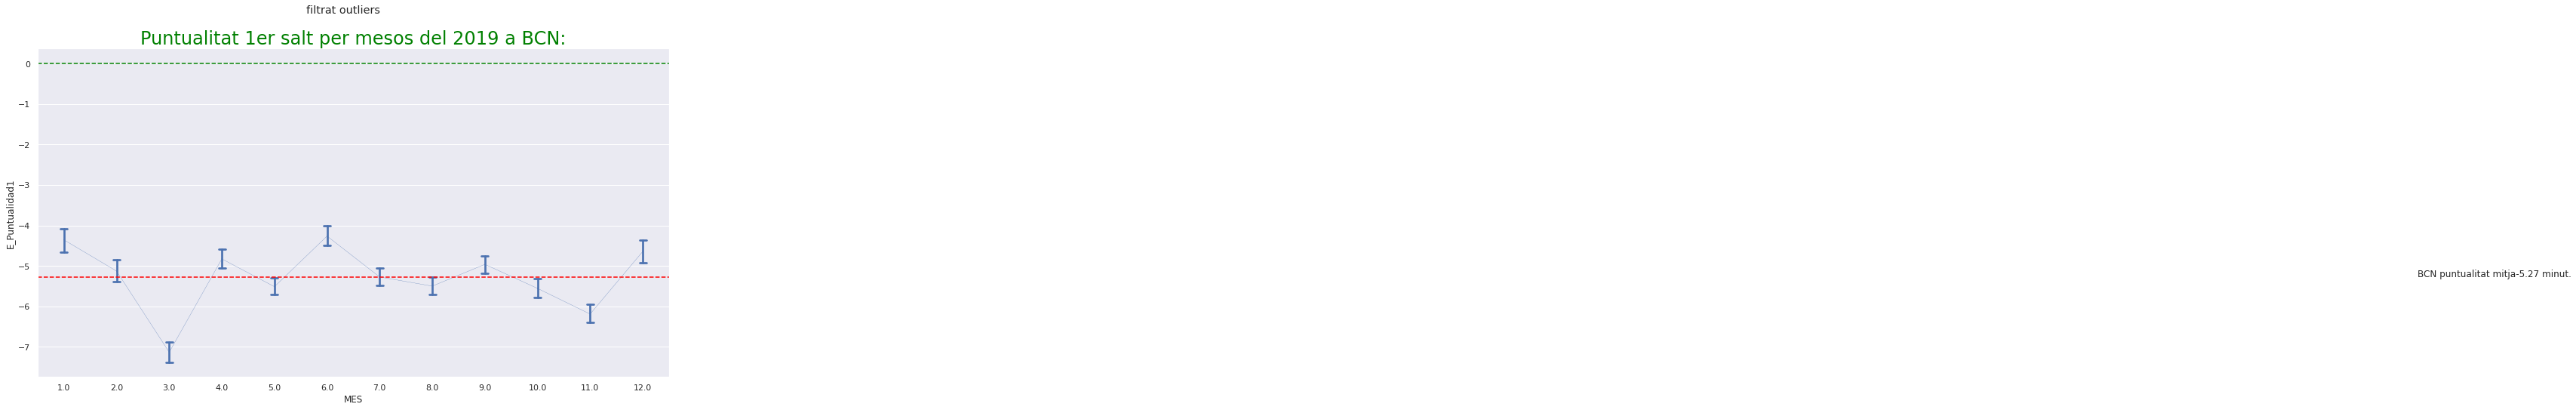

In [34]:
#@title Intervals de confiança per mes

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='MES', y = "E_Puntualidad1", data= df3, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df3['E_Puntualidad1'].mean()),2)#
print('Puntualitat BCN 1r salt: ', puntualidadBCN)
ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN +50 ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat 1er salt per mesos del 2019 a BCN:', fontsize = 24, color= 'green')
plt.suptitle(f'filtrat outliers')

# Quantitat vols en el primer salt.

In [35]:
#@title df4 Group --> MES, ve de df3.

df4= df3.copy() #[df3['MES', 'Secuencia']]
df4=df4.groupby(['MES', 'Secuencia']).size()
df4 = df4.reset_index() 
#df4['Quantitat']=df3.groupby(['MES', 'Secuencia']).size()
df4.columns = ['MES','Secuencia','QuantitatVols']
df4

,MES,Secuencia,QuantitatVols
0,1.0,1.0,10493
1,2.0,1.0,9549
2,3.0,1.0,10651
3,4.0,1.0,11711
4,5.0,1.0,12320
5,6.0,1.0,12120
6,7.0,1.0,11415
7,8.0,1.0,12122
8,9.0,1.0,11595
9,10.0,1.0,11737


Text(0.5, 0.98, 'filtrat outliers')

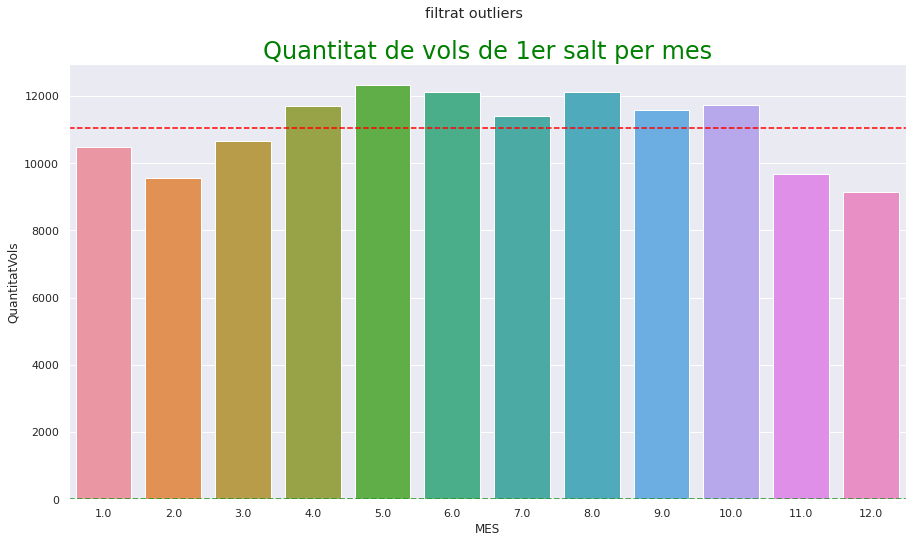

In [36]:
#df4.columns = ['MES', 'QuantitatVols'] # change column names
ax=sns.barplot(x = 'MES', y = 'QuantitatVols',   data=df4)

ax.set_title('Quantitat de vols de 1er salt per mes', fontsize = 24, color= 'green')
quantitatVolsMitjana= df4.QuantitatVols.mean()
ax.axhline(quantitatVolsMitjana, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')
plt.suptitle(f'filtrat outliers')

Veiem que a l'estiu hi han mes vols. Això vol dir que la probabilitat de ahver mes traffic influeis en la puntualitat

In [37]:
#@title crec el df5 
df5=df[['DEP', 'MES', 'E_Puntualidad1', 'Secuencia']].copy()

df5.media = df5.groupby(['MES']).mean('E_Puntualidad1')

df5.media
#df5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,E_Puntualidad1,Secuencia
MES,,
1.0,5.080506,5.835441
2.0,1.407520,7.254976
3.0,0.172117,7.596379
4.0,5.851469,11.910303
5.0,6.044040,16.580894
6.0,9.439683,10.658061
7.0,9.647667,13.584548
8.0,7.102275,11.382026
9.0,8.154873,13.550766


In [38]:
# Filtre primer enlairament a Barcelona

vuelosPrimerDespegue= ((df5['Secuencia']== 1) & (df5['DEP']=='BCN'))
df5 = df5[vuelosPrimerDespegue]
df5.media = df5.groupby(['MES']).mean('E_Puntualidad1')

print("Puntualitat a l'arribada a BCN en el primer salt")
df5.media['E_Puntualidad1']

Puntualitat a l'arribada a BCN en el primer salt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


MES
1.0    -2.251232
2.0    -0.814249
3.0    -3.339367
4.0    -1.821687
5.0    -0.393258
6.0    -2.243119
7.0    -2.476309
8.0    -3.832952
9.0     1.360190
10.0   -1.514739
11.0   -1.670792
12.0    3.807143
Name: E_Puntualidad1, dtype: float64

# Calcular els valors de Cp i Cpk

In [39]:
#@title Subrutina para el calcul del Cp i el Cpk

def Cp(clave, usl, lsl):
    
    sigma = df3[clave].std()

    Cp = abs(round((usl - lsl) / (6*sigma),2))
    print('Valor del Cp= ', Cp) 
    return Cp

def Cpk(clave, usl, lsl):

    sigma = df3[clave].std()    
    m = round(np.mean(df2[clave]),2)
    print('mitjana ', m)

    Cpu = float(-usl + m) / (3*sigma)
    Cpl = float(-m + lsl) / (3*sigma)
    #print('Cpks ', Cpu, Cpl)
    Cpk = round( np.min([Cpu, Cpl]),2)
    print('Valor del Cpk= ', Cpk) 

    return Cpk

In [40]:

Cp('E_Puntualidad1', -30, 30)
Cpk('E_Puntualidad1', -30, 30)
print('\nSegond salt')
#Cp('E_Puntualidad2', -30, 30)
#Cpk('E_Puntualidad2', -30, 30)

Valor del Cp=  0.78
mitjana  -1.47
Valor del Cpk=  0.75

Segond salt


**Comentari als valors de Cp i Cpk**
Veiem que els valors de Cp i Cpk són molt baixos perquè en el món de l'Automòbil els valors acceptats són 1,33 que vol dir que som capaços de ficar 1,3 la corba de Gauss dintre dels límits (-30 i 30 minuts).


---



# Conclusion generals per salt:

Text(0.5, 0.98, 'Puntualitat per salt (tots els aeroport)')

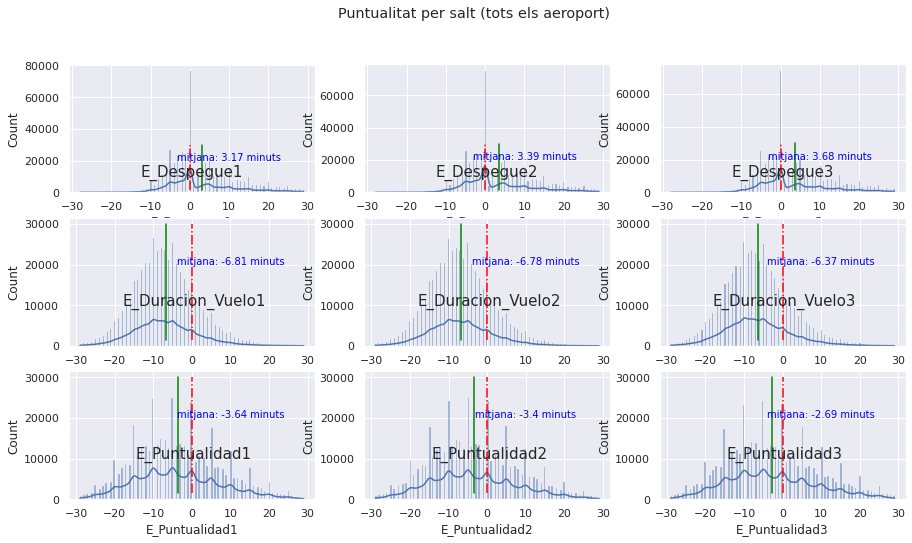

In [41]:
#@title gràfic generals per salt (tots els aeroport):

campo = ['E_Despegue1','E_Despegue2','E_Despegue3','E_Duracion_Vuelo1', 'E_Duracion_Vuelo2', 'E_Duracion_Vuelo3',  'E_Puntualidad1','E_Puntualidad2','E_Puntualidad3']
df_Errores= df.loc[:,campo]
for t in campo: 
  
  dfEliminarOutliers= ((df_Errores[t]>-30) & (df_Errores[t]<30)  ) 

  df_Errores = df_Errores[dfEliminarOutliers]
fig=plt.figure()
for i, column in enumerate(df_Errores.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df_Errores [column], kde=True) #, stat='density')
     
    plt.plot([0, 0], [1500, 30000], color='red', linestyle= 'dashdot')
    media= round(df_Errores[column].mean(),2)
    plt.plot( [media,media], [1500, 30000], color='green')
    #plt.set_title
    #print(max(df_Errores [column]), media)
    plt.text(0.5, 10000, column,
         horizontalalignment='center',
         fontsize=15,
        )
    texto = 'mitjana: '+ str(media) + ' minuts'
    plt.text(10, 20000, texto,
         horizontalalignment='center',
         fontsize=10,
         color='blue'
        )
fig.suptitle("Puntualitat per salt (tots els aeroport)")    

El gràfic demostra que: 

1.- A l'hora de enlairar-se el comportament és sortir tard uns 3 minuts. 

2.- En vol recuperar uns 6 minuts. 

3.- I la puntualitat és (3 -6) = 3 minuts abans

**Nota:** Cada columna es un salt.


---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Text(0.5, 0.98, "Puntualitat a l'aeroport de BCN")

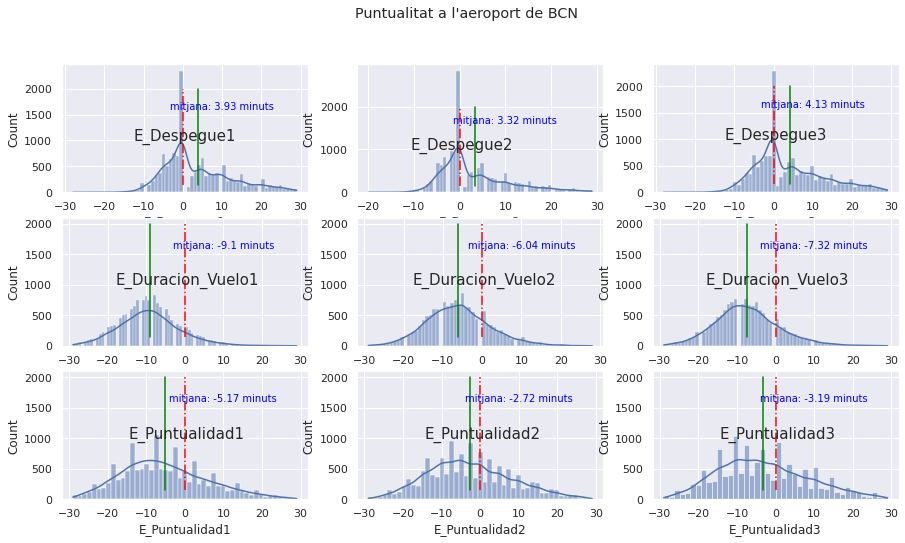

In [42]:
#@title graficar la operativitat de BCN
# Eliminar els outliers
df6=df.copy()
dfEliminarOutliers= ( (df['E_Puntualidad1']< 30) & (df['E_Puntualidad1']> -30) & (df['ARR']=='BCN'))

df6 = df[dfEliminarOutliers]

campo = ['E_Despegue1','E_Despegue2','E_Despegue3','E_Duracion_Vuelo1', 'E_Duracion_Vuelo2', 'E_Duracion_Vuelo3',  'E_Puntualidad1','E_Puntualidad2','E_Puntualidad3']

df_Errores1= df6.loc[:,campo]
for t in campo:   
  dfEliminarOutliers= ((df_Errores[t]>-30) & (df_Errores[t]<30) & (df['ARR']=='BCN') ) 
  df_Errores1 = df_Errores[dfEliminarOutliers]

fig=plt.figure()
for i, column in enumerate(df_Errores1.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df_Errores1 [column], kde=True)#, stat='density')
     
    plt.plot([0, 0], [150, 2000], color='red', linestyle= 'dashdot')
    media= round(df_Errores1[column].mean(),2)
    plt.plot( [media,media], [150, 2000], color='green')
    #plt.set_title
    #print(max(df_Errores [column]), media)
    plt.text(0.5, 1000, column,
         horizontalalignment='center',
         fontsize=15,
        )
    texto = 'mitjana: '+ str(media) + ' minuts'
    plt.text(10, 1600, texto,
         horizontalalignment='center',
         fontsize=10,
         color='blue'
        )
    
fig.suptitle("Puntualitat a l'aeroport de BCN")

# Salvar el fitxer princial.

In [43]:
guardar = 'No'
# Guardar excel
if guardar != 'No':
  nombreFichero = "D:\Documentos D\02.- Datos Vueling\Ryainair2019_" + Hoja + '_'+ str(fecha) + ".xlsx"

  df3.to_excel(nombreFichero)
  print()
  print('Guardado fichero : ', nombreFichero)
  print()
else:
  print('No guardado')

No guardado
